<h1><center><font size=10 color="green">Project 8 - Plants Seedling Classification</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

<h1><b><font size=3>Objective</font></b></h1>

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

<h1><b><font size=3>Data Description</font></b></h1>

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
  images.npy
  Label.csv

Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.
List of Plant species
* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common Wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet

# 2. Frame Problem

Key information from the problem statement - 
1. The goal of the project is to create a classifier capable of determining a plant's species from an image.
2. Build a Convolutional Neural Network (CNN) model which would classify the plant seedlings into their respective 12 categories.

This is a Multi-Class Classification problem. 
Dependent feature in this case are the labels for the images.

We will create below models -

<b><font color="blue"> Convolutional Neural Network (CNN)

# 3. Identify Model Evaluation Metrics

CNN model should be able to classify the plant seedlings into their respective 12 categories accurately. 

Types of errors for each class - 

Type I - False Positives. Model predicts that customer will leave(Exited = 1), but customer actually does not. This will waste Bank's resources in marketing activities (reaching out the customer, sending mail etc.). As mentioned in the problem statement, bank wants to concentrate efforts on potential customers with high probability of leaving. Hence, minimizing false positives is important.

Type II - False Negatives. Model predicts that customer will NOT leave, but customer actually does. This will be a potential opportunity loss. Obviously, bank wants to minimize this opportunity loss as well. From bank's business perspective, this is important as well.

Possible metrics are -

Accuracy: Accuracy is calculated as the total number of correct predictions (TP + TN) divided by the total number of a dataset (P + N).
      
      ACC = TP + TN / ( TP+TN+FP+FN)

Precision: Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).
      
      PREC = TP / (TP + FP)

Recall: Recall or Sensitivity or True Positive Rate (TPR)  is calculated as the number of correct positive predictions (TP) divided by the total number of positives (P).
      
      Recall = TP / (TP + FN)

F1-Score: Harmonic mean of precision and recall. It takes both false positive and false negatives into account. F1 score gives the same weightage to recall and precision. Therefore, it performs well on an imbalanced dataset.
      
      F1 = 2 * (PREC * RECALL) / (PREC + RECALL)

<b><font color="blue">Primary Metric(ACCURACY)</b></font> - We will want to identify the images correctly. All classes are equally important. Hence we will use ACCURACY as our primary metric. F1-Score will be used as a secondary metric, that balances False Positives as well as False Negatives.

Other Metrics - For reference, we will also report Recall and Precsion as well.

# 4. Reusable Custom Functions

Any reusable functions for the project. There are none created for this project.

# 5. Import Required libraries

In [1]:
# Install Tensorflow

!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# # To split the data into train and test
from sklearn.model_selection import train_test_split

# # To build linear regression_model
# #from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# To be used for data scaling and one hot encoding
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from scipy.stats import zscore

# # For boxcox
# from scipy.stats import boxcox 
# from sklearn.preprocessing import PowerTransformer

# # To build Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# # To build Logistic Regression
# from sklearn.linear_model import LogisticRegression

# # For Decision Tree Hyperparameter Tuning, Pre-pruning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# # Import Metrics
from sklearn import metrics

# # To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    r2_score
)

# # For Ensemble Techniques

# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
# #To install xgboost library use - !pip install xgboost 
# from xgboost import XGBClassifier

# # Importing Simple Imputer to treat the null values
# from sklearn.impute import SimpleImputer

# # for imbalanced data, to undersample and oversample the data
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # to create k folds of data and get cross validation score
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.model_selection import cross_val_score

# # To do one-hot encoding
# from sklearn.preprocessing import OneHotEncoder

# # To be used for creating pipelines and personalizing them
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

# For Clustering,to compute distances
# from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
# from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
# from sklearn.decomposition import PCA

# importing different functions to build Neural Network models

import tensorflow as tf
import keras_tuner as keras_tuner
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU, SpatialDropout2D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import random

from tensorflow.keras import backend
from tensorflow import keras
from keras_tuner.tuners import RandomSearch

from tensorflow.keras import losses, optimizers
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint

# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

# Display images using OpenCV
import cv2
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images


In [3]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 6. Import Dataset & Data Checks

In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Import images data as-is

images = np.load('/content/drive/My Drive/AI-ML/Module8_ComputerVision/PROJECT_8/images.npy')

In [6]:
# Import labels dataset as-is

#This line was used with Google Colab
labels=pd.read_csv('/content/drive/My Drive/AI-ML/Module8_ComputerVision/PROJECT_8/Labels.csv')

In [7]:
# Check shape of the images data

images.shape

(4750, 128, 128, 3)

In [8]:
# Check shape of the first image

images[0].shape

(128, 128, 3)

In [9]:
# Print array of pixel values

images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

Shape of images data

* There are 4750 samples of 128 * 128 colored images. 
* Samples = 4750
* Image Size = 128 * 128 array, that's 128 pixels along X & Y axis each. Pixel intensity values for the first image are seen in the array
* Channels = 3 , indicating that there are Red, Green and Blue channels

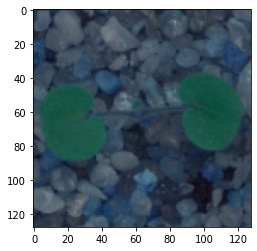

In [10]:
# Show first image using matplotlib

plt.imshow(images[0]);

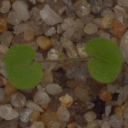

In [11]:
# Show first image using OpenCV

cv2_imshow(images[0])

We can ses that there is a difference in the image when displayed using matplotlib and OpenCV. OpenCV reads images in BGR format, while matplotlib reads in RGB format. 
For using OpenCV functions (especially Gaussian Blur) easily, we will convert these images to RGB images. For CNN models, this conversion should not make any difference.

In [12]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

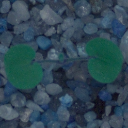

In [13]:
# Show first image again using OpenCV

cv2_imshow(images[0])

Images are now converted into the right format for OpenCV functions.

In [14]:
# Check labels info

labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [15]:
# Check shape of labels

labels.shape

(4750, 1)

In [16]:
 # Review sample 10 rows to confrm that data is loaded correctly 
labels.sample(10, random_state=1)

,Label
1697,Common Chickweed
3096,Scentless Mayweed
3180,Scentless Mayweed
1554,Common Chickweed
4746,Loose Silky-bent
2031,Common Chickweed
1995,Common Chickweed
1630,Common Chickweed
1123,Shepherds Purse
2601,Cleavers


In [17]:
# Check number of unique classes in the labels

labels.nunique()

Label    12
dtype: int64

In [18]:
# Check Unique classes in the labels

unique_labels = np.unique(labels)
unique_labels

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [19]:
# Check counts for various labels

labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

Dataset is imported successfully.

<b>Observations on the dataset</b>

1. Shape of images data

* There are 4750 images of 128 * 128 colored images. 
* Samples = 4750
* Image Size = 128 * 128 array, that's 128 pixels along X & Y axis. Pixel intensity values for the first image are seen in the array
* Channels = 3 , indicating that there are Red, Green and Blue channels

2. Shape of Labels data

* There are 4750 total number of labels
* 12 different types of labels, so 12 classes

3. The data is imbalanced, number of images are not the same for different labels (seedling names).

4. 'Loose Silky-bent' has most number of images. 'Maize' has the least number of images.

# 7. Perform Exploratory Data Analysis (EDA)

As part of EDA, we will check the distribution of labels and print images from each class labels.

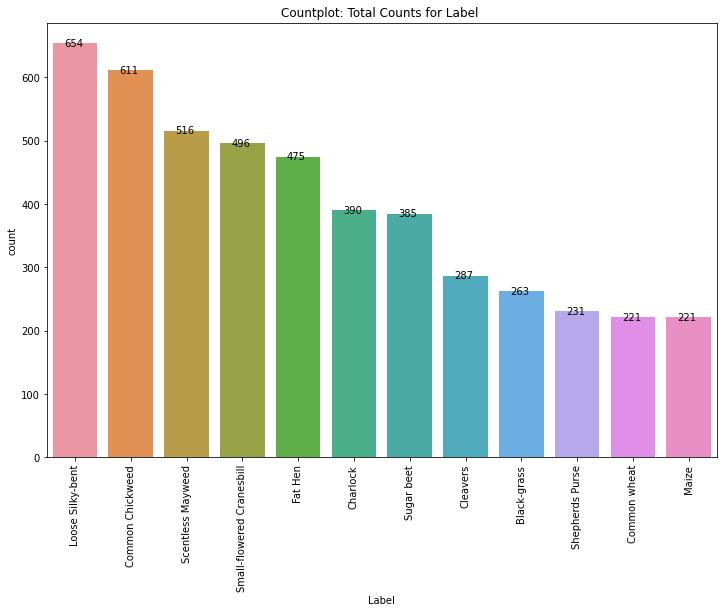

In [29]:
Temp_v = 'Label'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)

ax = sns.countplot(data=labels,x=Temp_v, order=labels[Temp_v].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Print images from each class and their corresponding labels

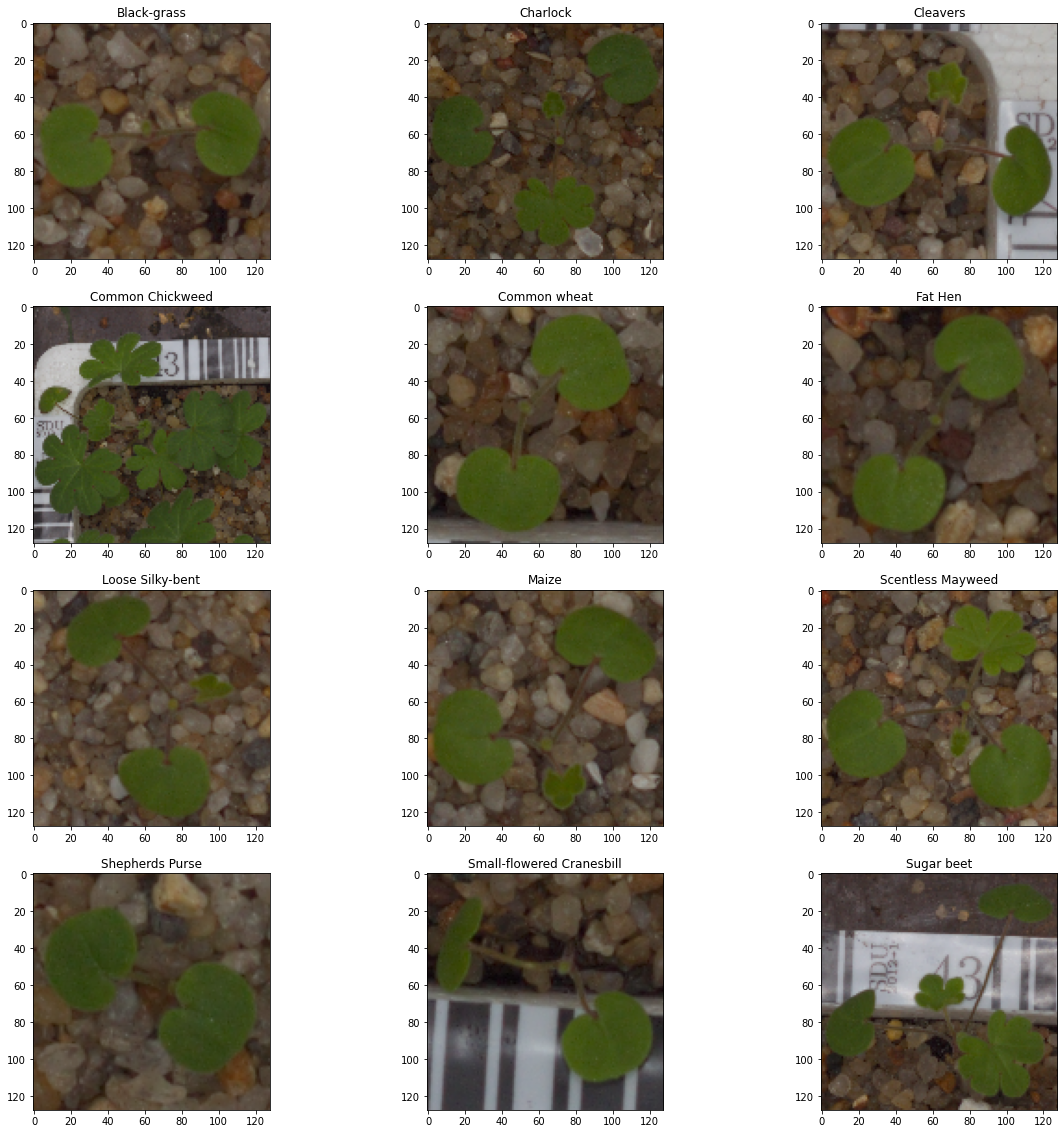

In [30]:
# Print images from each class and their corresponding labels
# Images are stored as NumPy arrays, and values in the array denote the pixel intensities of the image. We can use matplotlib's imshow function to visualize the image from NumPy arrays
# Print in the grid of 4 * 3 as there are 2 classes

categories=np.unique(labels)                                                
categories_count = len(categories)
rows = 4                                                                    
cols = 3                                                                    
fig = plt.figure(figsize=(20, 20))                                               
index = 0
for i in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      
        ax.imshow(images[index])  
        ax.set_title(categories[index])
        index += 1
plt.show()

<b>EDA Summary</b>

1. There are 12 classes, 12 different types of seedlings.
2. 'Loose Silky-bent' has most number of images. 'Maize' has the least number of images.
3. Classes are imbalanced, as in the distribution is not uniform for 12 classes. 

# 8. Perform Data Pre-processing

**Gaussian Blur**

Blurring is performed so that larger structural aspects of the images are retained and finer aspects are smoothed out. Purpose of the blurring or smoothing is to ensure that model learns enough aspects of the model required for image identification and classification.

In [20]:
# Applying Gaussian Blur to denoise the images

images_gb=[]
for i in range(len(images)):
   images_gb.append(cv2.GaussianBlur(images[i], ksize =(9,9),sigmaX =  0))
images_gb = np.array(images_gb)

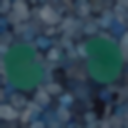

In [21]:
# Show first image using OpenCV

cv2_imshow(images_gb[0])

Let's print same images as above after blurring.

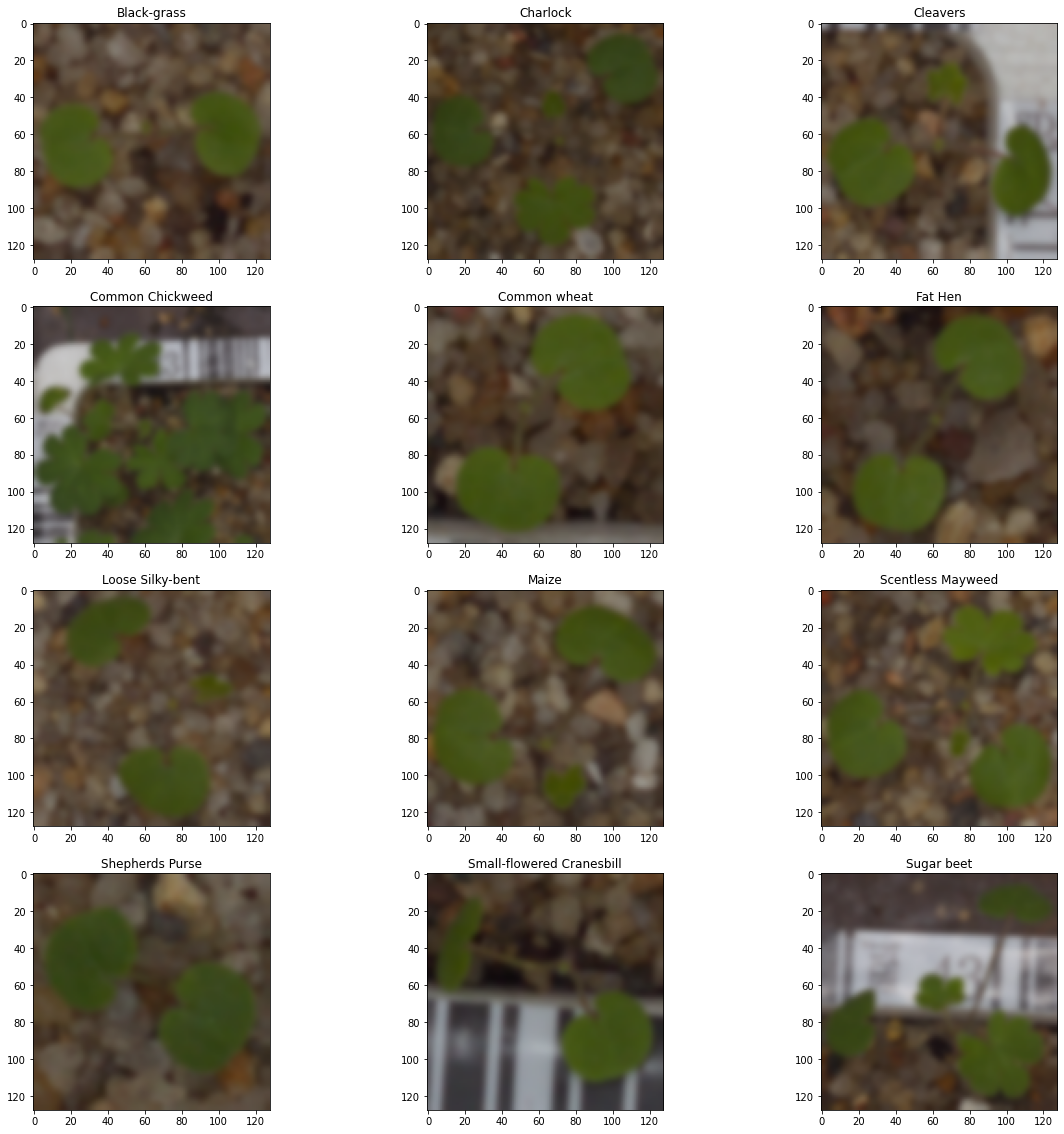

In [22]:
# Print images from each class and their corresponding labels
# Images are stored as NumPy arrays, and values in the array denote the pixel intensities of the image. We can use matplotlib's imshow function to visualize the image from NumPy arrays
# Print in the grid of 4 * 3 as there are 2 classes

categories=np.unique(labels)                                                
categories_count = len(categories)
rows = 4                                                                    
cols = 3                                                                    
fig = plt.figure(figsize=(20, 20))                                               
index = 0
for i in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      
        ax.imshow(images_gb[index])  
        ax.set_title(categories[index])
        index += 1
plt.show()

Tried using blurring with different kernel size. With (3,3), there is hardly any change in the images. With (15,15), data is lost from the images and will not be good for models. 

Not sure if the blurring will help. But for now, images post Gaussian Blur will be used in subsequent operations.

**Normalization**

In neural networks, it is always suggested to normalize the feature inputs. Normalization has the below benefits while training the model of a neural network:

Normalization makes the training faster and reduces the chances of getting stuck at local optima.
weight decay and estimation can be done more conveniently with normalized inputs.
In deep neural networks, normalization helps to avoid exploding gradient problems. Exploding Gradients problem occurs when large error gradients accumulate and result in very large updates to neural network model weights during training. This makes a model unstable and unable to learn from the training data.

In [23]:
images_gb[0]

array([[[ 79,  59,  43],
        [ 82,  61,  46],
        [ 87,  68,  53],
        ...,
        [108,  93,  78],
        [109,  93,  78],
        [109,  93,  79]],

       [[ 80,  60,  44],
        [ 82,  62,  47],
        [ 88,  69,  54],
        ...,
        [108,  93,  78],
        [108,  93,  78],
        [108,  93,  79]],

       [[ 81,  62,  45],
        [ 84,  65,  48],
        [ 90,  72,  56],
        ...,
        [107,  92,  77],
        [108,  93,  78],
        [108,  93,  79]],

       ...,

       [[ 71,  54,  39],
        [ 71,  54,  40],
        [ 72,  55,  41],
        ...,
        [ 89,  71,  54],
        [ 92,  74,  58],
        [ 93,  75,  59]],

       [[ 72,  56,  41],
        [ 72,  56,  41],
        [ 73,  56,  42],
        ...,
        [ 88,  69,  51],
        [ 91,  72,  55],
        [ 92,  74,  56]],

       [[ 73,  56,  41],
        [ 73,  56,  42],
        [ 73,  57,  42],
        ...,
        [ 87,  68,  49],
        [ 90,  72,  54],
        [ 91,  73,  55]]

In [24]:
images_gb = images_gb/255.0

In [25]:
images_gb[0]

array([[[0.30980392, 0.23137255, 0.16862745],
        [0.32156863, 0.23921569, 0.18039216],
        [0.34117647, 0.26666667, 0.20784314],
        ...,
        [0.42352941, 0.36470588, 0.30588235],
        [0.42745098, 0.36470588, 0.30588235],
        [0.42745098, 0.36470588, 0.30980392]],

       [[0.31372549, 0.23529412, 0.17254902],
        [0.32156863, 0.24313725, 0.18431373],
        [0.34509804, 0.27058824, 0.21176471],
        ...,
        [0.42352941, 0.36470588, 0.30588235],
        [0.42352941, 0.36470588, 0.30588235],
        [0.42352941, 0.36470588, 0.30980392]],

       [[0.31764706, 0.24313725, 0.17647059],
        [0.32941176, 0.25490196, 0.18823529],
        [0.35294118, 0.28235294, 0.21960784],
        ...,
        [0.41960784, 0.36078431, 0.30196078],
        [0.42352941, 0.36470588, 0.30588235],
        [0.42352941, 0.36470588, 0.30980392]],

       ...,

       [[0.27843137, 0.21176471, 0.15294118],
        [0.27843137, 0.21176471, 0.15686275],
        [0.28235294, 0

In [26]:
labels = labels.replace({'Black-grass': 0, 'Charlock':1, 'Cleavers':2, 'Common Chickweed':3,
       'Common wheat':4, 'Fat Hen':5, 'Loose Silky-bent':6, 'Maize':7,
       'Scentless Mayweed':8, 'Shepherds Purse':9,
       'Small-flowered Cranesbill':10, 'Sugar beet':11})

In [27]:
labelList = labels.Label.unique()

# 9. Prepare TRAIN and TEST datasets

Separate TRAIN, VALIDATION and TEST datasets from TOTAL dataset.

We will use stratify on class while splitting the datasets. This will ensure that proportion of classes will be similar in datasets.

Let's separate Dependent and Independent features in X and y

In [28]:
# Create train and test datasets

X_temp, X_test, y_temp, y_test = train_test_split(images_gb,labels , test_size=0.2, random_state=42,stratify=labels) 

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp,test_size=0.2, random_state=42,stratify=y_temp) 

In [29]:
# Shapes of TOTAL, TRAIN and TEST Datasets

print(" TOTAL Dataset \n Shape of the dataset:", images_gb.shape, "\n Number of images:", images_gb.shape[0], "\n", "Number of labels:", labels.shape[0], "\n")

print(" TRAIN Dataset \n Shape of the dataset:", X_train.shape, "\n Number of images:", X_train.shape[0], "\n", "Number of labels:", y_train.shape[0], "\n")

print(" VALIDATION Dataset \n Shape of the dataset:", X_val.shape, "\n Number of images:", X_val.shape[0], "\n", "Number of labels:", y_val.shape[0], "\n")

print(" TEST Dataset \n Shape of the dataset:", X_test.shape, "\n Number of images:", X_test.shape[0], "\n", "Number of labels:", y_test.shape[0], "\n")

 TOTAL Dataset 
 Shape of the dataset: (4750, 128, 128, 3) 
 Number of images: 4750 
 Number of labels: 4750 

 TRAIN Dataset 
 Shape of the dataset: (3040, 128, 128, 3) 
 Number of images: 3040 
 Number of labels: 3040 

 VALIDATION Dataset 
 Shape of the dataset: (760, 128, 128, 3) 
 Number of images: 760 
 Number of labels: 760 

 TEST Dataset 
 Shape of the dataset: (950, 128, 128, 3) 
 Number of images: 950 
 Number of labels: 950 



In [30]:
# Shapes of TOTAL, TRAIN and TEST Datasets for Dependent feature

print(" For TOTAL Dataset \n", labels.value_counts(normalize=True)*100, '\n')

print(" For TRAIN Dataset \n", y_train.value_counts(normalize=True)*100, '\n')

print(" For VALIDATION Dataset \n", y_val.value_counts(normalize=True)*100, '\n')

print(" For TEST Dataset \n", y_test.value_counts(normalize=True)*100, '\n')

 For TOTAL Dataset 
 Label
6       13.7684
3       12.8632
8       10.8632
10      10.4421
5       10.0000
1        8.2105
11       8.1053
2        6.0421
0        5.5368
9        4.8632
4        4.6526
7        4.6526
dtype: float64 

 For TRAIN Dataset 
 Label
6       13.7500
3       12.8618
8       10.8553
10      10.4605
5       10.0000
1        8.2237
11       8.0921
2        6.0197
0        5.5263
9        4.8684
4        4.6711
7        4.6711
dtype: float64 

 For VALIDATION Dataset 
 Label
6       13.8158
3       12.8947
8       10.9211
10      10.3947
5       10.0000
1        8.1579
11       8.1579
2        6.0526
0        5.5263
9        4.8684
4        4.6053
7        4.6053
dtype: float64 

 For TEST Dataset 
 Label
6       13.7895
3       12.8421
8       10.8421
10      10.4211
5       10.0000
1        8.2105
11       8.1053
2        6.1053
0        5.5789
9        4.8421
4        4.6316
7        4.6316
dtype: float64 



Due to use of stratify on target feature while splitting the datasets, proportion of classes is similar in Train, Validation and Test datasets.

There are 12 classes, multi-class classification problem. Output layer of CNN  should have 12 neurons which will provide us with the probabilities of the input image belonging to each of those 12 classes. Therefore, we also need to create a one-hot encoded representation for the target labels.

In [31]:
y_train.head()

,Label
2123,1
2578,2
2962,8
2847,8
3680,7


In [32]:
# Creating one-hot encoded representation of target labels
# we can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [33]:
y_train_encoded[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
# Per project FAQs - below code can be used to treat the class imbalance by increasing the weights of the minority classes.
# We will use these Class Weights while fitting the model

from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7966457023060797,
 1: 0.8333333333333334,
 2: 1.7117117117117118,
 3: 1.784037558685446,
 4: 0.6479113384484229,
 5: 1.0133333333333334,
 6: 1.384335154826958,
 7: 0.7676767676767676,
 8: 1.029810298102981,
 9: 1.784037558685446,
 10: 1.507936507936508,
 11: 0.6060606060606061}

TRAIN, VALIDATION and TEST Datasets are ready now.

# 10. Create CNN Models

We will expriment and create several CNN models.

For each model, we will - 
1. Start by creating 2 models with variation in number of convolutional and dense layers
2. Use Regularization techniques like Dropout, Spatial Dropout and Batch Normalization
3. Use Data Augmentation
4. Use Transfer Learning from VGG16 model
5. Compare models on the evaluation metrics and choose the best model

### Model 1 - Initial / Base CNN model

Create initial CNN model with some layers for convolution and dense. 

In [49]:
# Clear the previous model's history from the session. In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [50]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128,128,3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Second CNN Layer
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# Third CNN Layer
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model1.add(Dense(100, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# categorical_crossentropy is used as this is a multi-class classification problem. 
# Accuracy is used as the metric to measure the performance of the model.
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

**Early stopping** is a technique similar to cross-validation where a part of training data is kept as the validation data. When the performance of the validation data starts worsening, the model will immediately stop the training.
- **Monitor**: Quantity to be monitored.
- **Mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
- **Patience**: Number of epochs with no improvement after which training will be stopped.

**ModelCheckpoint** callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.

In [51]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history1=model1.fit(X_train, y_train_encoded, epochs=30, batch_size=32,class_weight=(class_weights),validation_data=(X_val,y_val_encoded),callbacks=[es, mc])  

Epoch 1/30
93/95 [============================>.] - ETA: 0s - loss: 2.6636 - accuracy: 0.2026
Epoch 1: val_accuracy improved from -inf to 0.33026, saving model to best_model.h5
95/95 [==============================] - 16s 32ms/step - loss: 2.6541 - accuracy: 0.2036 - val_loss: 2.0958 - val_accuracy: 0.3303
Epoch 2/30
94/95 [============================>.] - ETA: 0s - loss: 1.9032 - accuracy: 0.3936
Epoch 2: val_accuracy improved from 0.33026 to 0.45921, saving model to best_model.h5
95/95 [==============================] - 2s 24ms/step - loss: 1.8984 - accuracy: 0.3947 - val_loss: 1.5585 - val_accuracy: 0.4592
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 1.5138 - accuracy: 0.5113
Epoch 3: val_accuracy improved from 0.45921 to 0.52237, saving model to best_model.h5
95/95 [==============================] - 2s 24ms/step - loss: 1.5143 - accuracy: 0.5109 - val_loss: 1.3492 - val_accuracy: 0.5224
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 1.29

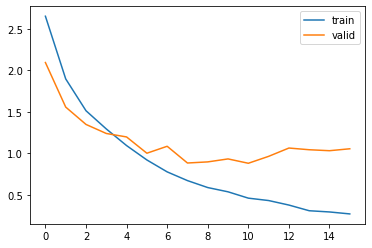

In [53]:
# Capturing learning history per epoch, for loss values
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

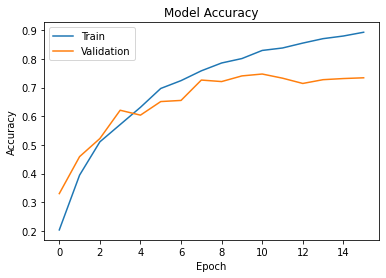

In [54]:
# Capturing learning history per epoch, for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
# Results for Test data

results1 = model1.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 1s 20ms/step - loss: 1.2615 - accuracy: 0.6905


In [56]:
# Predict labels on test data using the model

y_pred_model1=model1.predict(X_test)

In [57]:
y_pred_model1

array([[1.7990806e-15, 5.4686194e-10, 8.3491850e-06, ..., 4.0114692e-06,
        9.9622619e-01, 2.6926783e-09],
       [4.3537377e-13, 1.3824672e-07, 8.7729895e-05, ..., 1.2177348e-04,
        9.9976605e-01, 7.4079748e-10],
       [2.9992061e-14, 8.2494359e-04, 5.6268701e-10, ..., 3.1549837e-02,
        2.5598796e-05, 8.0422524e-08],
       ...,
       [1.8463795e-01, 4.2828577e-10, 6.8342561e-06, ..., 3.4468268e-09,
        7.9168365e-12, 1.4803307e-04],
       [8.2506918e-11, 1.8949864e-20, 1.6092959e-22, ..., 9.4112779e-17,
        4.5555330e-12, 1.8642065e-12],
       [9.2534870e-21, 9.9910516e-01, 8.5377792e-04, ..., 5.2309903e-09,
        4.0957970e-05, 5.1637966e-10]], dtype=float32)

In [58]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model1=np.argmax(y_pred_model1,axis=1)

y_test_model1=np.argmax(y_test_encoded,axis=1)

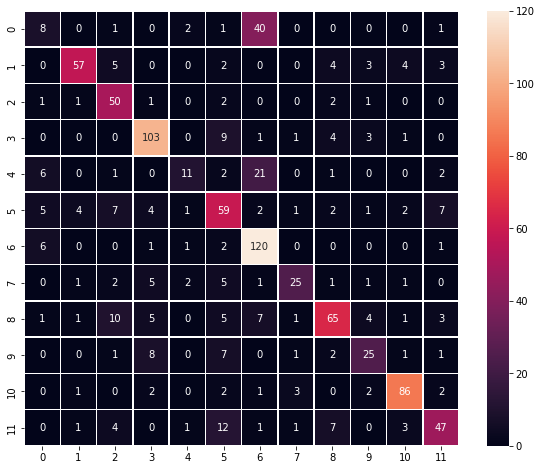

In [59]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model1,y_pred_model1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [60]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model1), y_pred_model1))

              precision    recall  f1-score   support

           0       0.30      0.15      0.20        53
           1       0.86      0.73      0.79        78
           2       0.62      0.86      0.72        58
           3       0.80      0.84      0.82       122
           4       0.61      0.25      0.35        44
           5       0.55      0.62      0.58        95
           6       0.62      0.92      0.74       131
           7       0.76      0.57      0.65        44
           8       0.74      0.63      0.68       103
           9       0.62      0.54      0.58        46
          10       0.87      0.87      0.87        99
          11       0.70      0.61      0.65        77

    accuracy                           0.69       950
   macro avg       0.67      0.63      0.64       950
weighted avg       0.69      0.69      0.68       950



<b> Model 1 interpretations </b>

1. Train accuracy is 89% whereas Test accuracy is 69%. Model certainly seems to be overfit. This is evident from the graphs for loss and accuracy above.
2. Looking at the Confusion Matrix - 
    * Example label with mis-classifications - Label 0. Out of 53 Test images, only 8 were predicted correctly.
    * Example label with good classifications - Label 6. Out of 131 Test images, 120 are predicted correctly
3. Precision, Recall and F1 scores are mentioned above.

### Model2 - CNN with different model architecture, different number of convolutional and fully connected layers

As Model1 is overfitting, we will try to use a simpler model with reduced number of trainable parameters this time.

In [61]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [63]:
model2 = Sequential()

# Convolutional Layer 1
model2.add(Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3), padding = 'same'))
model2.add(MaxPooling2D(2,2))

# Convolutional Layer 2
model2.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(2,2))

# Convolutional Layer 3
model2.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(2,2))

# Convolutional Layer 4
model2.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
model2.add(MaxPooling2D(2,2))

# Flatten the outfor for fully connected layers
model2.add(Flatten())

# Fully Connected Layer 1

model2.add(Dense(128, activation='relu'))

# Fully Connected Layer 2
model2.add(Dense(64, activation='relu'))

# Fully Connected Layer 3
model2.add(Dense(32, activation='relu'))

# Fully Connected Layer 4
model2.add(Dense(16, activation='relu'))

# Output Layer
model2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)      

In [64]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history2=model2.fit(X_train, y_train_encoded, epochs=30, batch_size=32,class_weight=(class_weights),validation_data=(X_val,y_val_encoded),callbacks=[es, mc]) 

Epoch 1/30
94/95 [============================>.] - ETA: 0s - loss: 2.8739 - accuracy: 0.1280
Epoch 1: val_accuracy improved from -inf to 0.12895, saving model to best_model.h5
95/95 [==============================] - 4s 29ms/step - loss: 2.8739 - accuracy: 0.1283 - val_loss: 2.4646 - val_accuracy: 0.1289
Epoch 2/30
94/95 [============================>.] - ETA: 0s - loss: 2.8075 - accuracy: 0.1303
Epoch 2: val_accuracy did not improve from 0.12895
95/95 [==============================] - 2s 24ms/step - loss: 2.8066 - accuracy: 0.1303 - val_loss: 2.4319 - val_accuracy: 0.1289
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 2.5831 - accuracy: 0.2161
Epoch 3: val_accuracy improved from 0.12895 to 0.33026, saving model to best_model.h5
95/95 [==============================] - 2s 24ms/step - loss: 2.5792 - accuracy: 0.2161 - val_loss: 2.0355 - val_accuracy: 0.3303
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 2.0729 - accuracy: 0.3590
Epoch 4: val_a

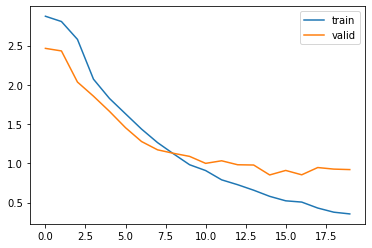

In [65]:
# Capturing learning history per epoch, for loss
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

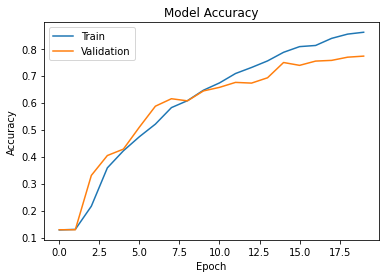

In [66]:
# Capturing learning history per epoch, for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
# Results for Test data

results2 = model2.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 0s 13ms/step - loss: 1.0447 - accuracy: 0.7284


In [68]:
# Predict labels using the model

y_pred_model2=model2.predict(X_test)

In [69]:
y_pred_model2

array([[3.38290340e-10, 3.03461684e-06, 3.98975134e-15, ...,
        1.95142600e-12, 9.99997020e-01, 2.72564904e-09],
       [5.15420651e-10, 9.33488409e-05, 3.22419008e-10, ...,
        1.37838585e-08, 9.99906659e-01, 4.99790218e-08],
       [2.45254370e-07, 3.27896178e-01, 2.91429018e-07, ...,
        1.27679016e-02, 6.67899381e-03, 4.33480367e-03],
       ...,
       [2.45066896e-01, 2.86736595e-05, 6.67448148e-06, ...,
        1.07825929e-06, 7.89498866e-09, 2.12722625e-06],
       [5.00986381e-08, 5.87792615e-09, 1.10539848e-10, ...,
        1.46172007e-20, 3.13642745e-26, 1.57015467e-08],
       [1.49338996e-11, 9.92587030e-01, 6.66947011e-03, ...,
        1.30953695e-05, 6.89406355e-04, 1.70373564e-08]], dtype=float32)

In [70]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model2=np.argmax(y_pred_model2,axis=1)

y_test_model2=np.argmax(y_test_encoded,axis=1)

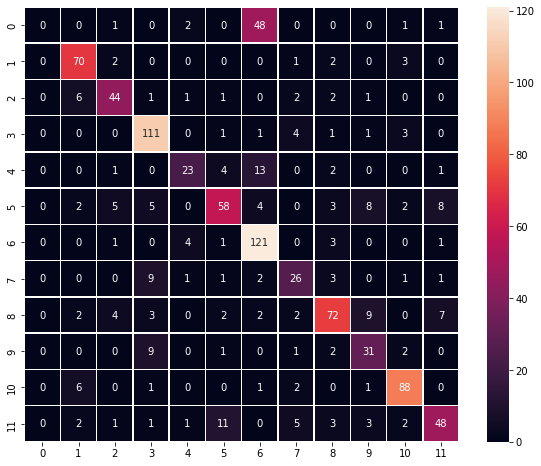

In [71]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model2,y_pred_model2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model2), y_pred_model2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.80      0.90      0.84        78
           2       0.75      0.76      0.75        58
           3       0.79      0.91      0.85       122
           4       0.72      0.52      0.61        44
           5       0.72      0.61      0.66        95
           6       0.63      0.92      0.75       131
           7       0.60      0.59      0.60        44
           8       0.77      0.70      0.73       103
           9       0.57      0.67      0.62        46
          10       0.86      0.89      0.88        99
          11       0.72      0.62      0.67        77

    accuracy                           0.73       950
   macro avg       0.66      0.67      0.66       950
weighted avg       0.69      0.73      0.70       950



<b> Model 2 interpretations </b>

1. Train accuracy is 86% whereas Test accuracy is 73%. Model seems to be overfit. But has improved as compared to Model 1.
2. Looking at the Confusion Matrix - 
    * Example label with mis-classifications - Label 0. Out of 53 records, NONE were predicted correctly.
    * Example labels with good classifications - Label 6. Out of 131 records, 121 are predicted correctly
3. Precision, Recall and F1 scores are mentioned above.

Model comparison of first 2 models - 

Both models seem to be overfit, as Validation as well as Test Accuracy and F1 scores are lower than Train dataset.

Below is the comparison - 

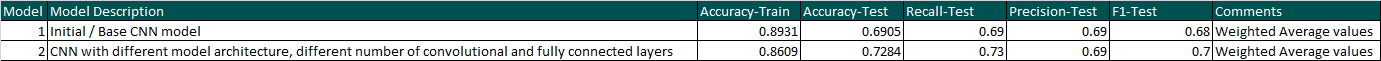

As there is not much difference in the Accuracy and F1 scores, we will choose the simpler model which is Model2 and try to use Regularization techniques to reduce overfitting.

### Model3 - CNN with same number of layers in Model2, with Dropout

Now we will use another regularization technique - dropout.

In [73]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [74]:
# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(Dropout(0.2))

# Second CNN Layer
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(Dropout(0.2))

# Third CNN Layer
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2), padding = 'same'))
model3.add(Dropout(0.2))

# Convolutional Layer 4
model3.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.2))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Fully Connected Layer 1

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))

# Fully Connected Layer 2
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))

# Fully Connected Layer 3
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))

# Fully Connected Layer 4
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model3.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# categorical_crossentropy is used as this is a multi-class classification problem. 
# Accuracy is used as the metric to measure the performance of the model.
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0

In [75]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history3=model3.fit(X_train, y_train_encoded, epochs=30, batch_size=32,class_weight=(class_weights),validation_data=(X_val,y_val_encoded),callbacks=[es, mc]) 

Epoch 1/30
94/95 [============================>.] - ETA: 0s - loss: 2.9257 - accuracy: 0.1267
Epoch 1: val_accuracy improved from -inf to 0.12895, saving model to best_model.h5
95/95 [==============================] - 4s 31ms/step - loss: 2.9248 - accuracy: 0.1263 - val_loss: 2.4423 - val_accuracy: 0.1289
Epoch 2/30
93/95 [============================>.] - ETA: 0s - loss: 2.8323 - accuracy: 0.1324
Epoch 2: val_accuracy did not improve from 0.12895
95/95 [==============================] - 2s 25ms/step - loss: 2.8297 - accuracy: 0.1339 - val_loss: 2.3838 - val_accuracy: 0.1289
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 2.6124 - accuracy: 0.1872
Epoch 3: val_accuracy improved from 0.12895 to 0.25658, saving model to best_model.h5
95/95 [==============================] - 2s 26ms/step - loss: 2.6092 - accuracy: 0.1882 - val_loss: 2.1608 - val_accuracy: 0.2566
Epoch 4/30
93/95 [============================>.] - ETA: 0s - loss: 2.3627 - accuracy: 0.2816
Epoch 4: val_a

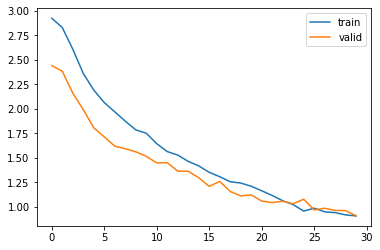

In [76]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

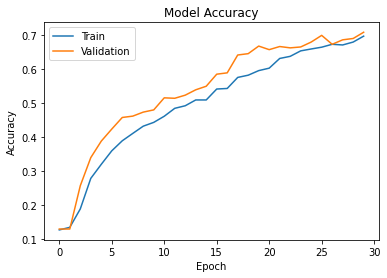

In [77]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [78]:
# Results for Test data

results3 = model3.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 0s 12ms/step - loss: 0.9932 - accuracy: 0.6874


In [79]:
# Predict labels using the model

y_pred_model3=model3.predict(X_test)

In [80]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model3=np.argmax(y_pred_model3,axis=1)

y_test_model3=np.argmax(y_test_encoded,axis=1)

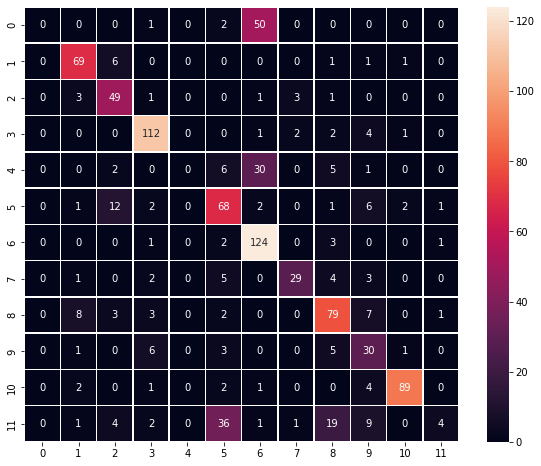

In [81]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model3,y_pred_model3)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [82]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model3), y_pred_model3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.80      0.88      0.84        78
           2       0.64      0.84      0.73        58
           3       0.85      0.92      0.89       122
           4       0.00      0.00      0.00        44
           5       0.54      0.72      0.62        95
           6       0.59      0.95      0.73       131
           7       0.83      0.66      0.73        44
           8       0.66      0.77      0.71       103
           9       0.46      0.65      0.54        46
          10       0.95      0.90      0.92        99
          11       0.57      0.05      0.10        77

    accuracy                           0.69       950
   macro avg       0.57      0.61      0.57       950
weighted avg       0.63      0.69      0.63       950



<b> Model 3 interpretations </b>

1. Train accuracy is 69% whereas Test accuracy is 68%. 
Model accuracy has reduced, but train and test values are much closer.

### Model4 - CNN with same number of layers in Model1, with Spatial Dropout

Now we will use another regularization technique - Spatial dropout.

In [83]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [84]:
# Intializing a sequential model
model4 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model4.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model4.add(MaxPooling2D((2, 2), padding = 'same'))
model4.add(SpatialDropout2D(0.2))

# Second CNN Layer
model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(MaxPooling2D((2, 2), padding = 'same'))
model4.add(SpatialDropout2D(0.2))

# Third CNN Layer
model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(MaxPooling2D((2, 2), padding = 'same'))
model4.add(SpatialDropout2D(0.2))

# Convolutional Layer 4
model4.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
model4.add(MaxPooling2D(2,2))
model4.add(SpatialDropout2D(0.2))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model4.add(Flatten())

# Fully Connected Layer 1

model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.2))

# Fully Connected Layer 2
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.2))

# Fully Connected Layer 3
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.2))

# Fully Connected Layer 4
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model4.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# categorical_crossentropy is used as this is a multi-class classification problem. 
# Accuracy is used as the metric to measure the performance of the model.
# Compile model
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 64, 64, 64)       0         
 ropout2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [85]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history4=model4.fit(X_train, y_train_encoded, epochs=30, batch_size=32,class_weight=(class_weights),validation_data=(X_val,y_val_encoded),callbacks=[es, mc]) 

Epoch 1/30
93/95 [============================>.] - ETA: 0s - loss: 2.9358 - accuracy: 0.1267
Epoch 1: val_accuracy improved from -inf to 0.12895, saving model to best_model.h5
95/95 [==============================] - 4s 31ms/step - loss: 2.9327 - accuracy: 0.1266 - val_loss: 2.4422 - val_accuracy: 0.1289
Epoch 2/30
94/95 [============================>.] - ETA: 0s - loss: 2.8500 - accuracy: 0.1356
Epoch 2: val_accuracy did not improve from 0.12895
95/95 [==============================] - 2s 24ms/step - loss: 2.8485 - accuracy: 0.1352 - val_loss: 2.4385 - val_accuracy: 0.1289
Epoch 3/30
94/95 [============================>.] - ETA: 0s - loss: 2.8252 - accuracy: 0.1283
Epoch 3: val_accuracy did not improve from 0.12895
95/95 [==============================] - 2s 24ms/step - loss: 2.8243 - accuracy: 0.1293 - val_loss: 2.4491 - val_accuracy: 0.1289
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 2.8157 - accuracy: 0.1293
Epoch 4: val_accuracy did not improve from 0.1289

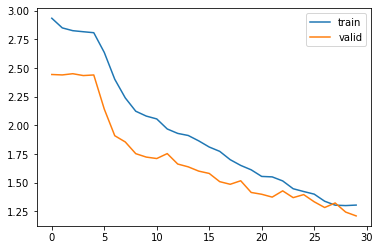

In [86]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history4.history)
hist['epoch'] = history4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

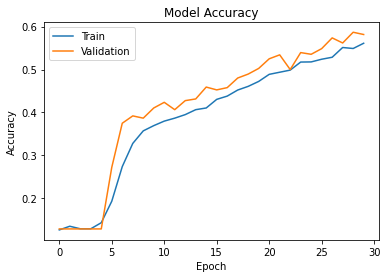

In [87]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [88]:
# Results for Test data

results4 = model4.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 0s 12ms/step - loss: 1.2572 - accuracy: 0.5663


In [89]:
# Predict labels using the model

y_pred_model4=model4.predict(X_test)

In [90]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model4=np.argmax(y_pred_model4,axis=1)

y_test_model4=np.argmax(y_test_encoded,axis=1)

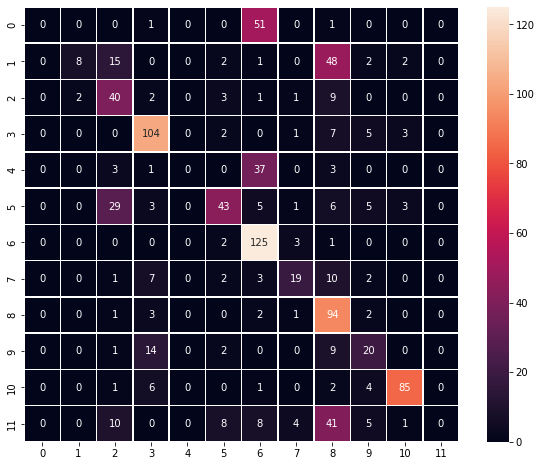

In [91]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model4,y_pred_model4)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [92]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model4), y_pred_model4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.80      0.10      0.18        78
           2       0.40      0.69      0.50        58
           3       0.74      0.85      0.79       122
           4       0.00      0.00      0.00        44
           5       0.67      0.45      0.54        95
           6       0.53      0.95      0.68       131
           7       0.63      0.43      0.51        44
           8       0.41      0.91      0.56       103
           9       0.44      0.43      0.44        46
          10       0.90      0.86      0.88        99
          11       0.00      0.00      0.00        77

    accuracy                           0.57       950
   macro avg       0.46      0.47      0.42       950
weighted avg       0.51      0.57      0.49       950



<b> Model 4 interpretations </b>

1. Train and Test accuracy is significantly reduced to 56%


### Model5 -  CNN with same number of layers in Model1, with Batch Normalization

In [93]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [94]:
# Intializing a sequential model
model5 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model5.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model5.add(MaxPooling2D((2, 2), padding = 'same'))
model5.add(BatchNormalization())

# Second CNN Layer
model5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model5.add(MaxPooling2D((2, 2), padding = 'same'))
model5.add(BatchNormalization())

# Third CNN Layer
model5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model5.add(MaxPooling2D((2, 2), padding = 'same'))
model5.add(BatchNormalization())

# Convolutional Layer 4
model5.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
model5.add(MaxPooling2D(2,2))
model5.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model5.add(Flatten())

# Fully Connected Layer 1

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())

# Fully Connected Layer 2
model5.add(Dense(64, activation='relu'))
model5.add(BatchNormalization())

# Fully Connected Layer 3
model5.add(Dense(32, activation='relu'))
model5.add(BatchNormalization())

# Fully Connected Layer 4
model5.add(Dense(16, activation='relu'))
model5.add(BatchNormalization())

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model5.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# categorical_crossentropy is used as this is a multi-class classification problem. 
# Accuracy is used as the metric to measure the performance of the model.
# Compile model
model5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                        

In [95]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history5=model5.fit(X_train, y_train_encoded, epochs=30, batch_size=32,class_weight=(class_weights),validation_data=(X_val,y_val_encoded),callbacks=[es, mc]) 

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 2.8006 - accuracy: 0.2072
Epoch 1: val_accuracy improved from -inf to 0.13816, saving model to best_model.h5
95/95 [==============================] - 5s 37ms/step - loss: 2.8006 - accuracy: 0.2072 - val_loss: 2.6420 - val_accuracy: 0.1382
Epoch 2/30
94/95 [============================>.] - ETA: 0s - loss: 1.8917 - accuracy: 0.4451
Epoch 2: val_accuracy did not improve from 0.13816
95/95 [==============================] - 2s 25ms/step - loss: 1.8884 - accuracy: 0.4457 - val_loss: 4.0652 - val_accuracy: 0.1382
Epoch 3/30
93/95 [============================>.] - ETA: 0s - loss: 1.4415 - accuracy: 0.5464
Epoch 3: val_accuracy did not improve from 0.13816
95/95 [==============================] - 2s 25ms/step - loss: 1.4412 - accuracy: 0.5451 - val_loss: 4.0485 - val_accuracy: 0.0961
Epoch 4/30
94/95 [============================>.] - ETA: 0s - loss: 1.1465 - accuracy: 0.6519
Epoch 4: val_accuracy improved from 0.13816 to 0.

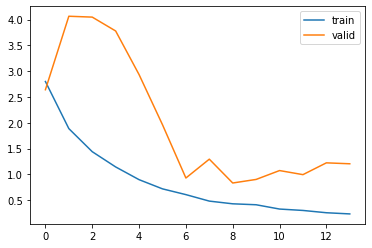

In [96]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history5.history)
hist['epoch'] = history5.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

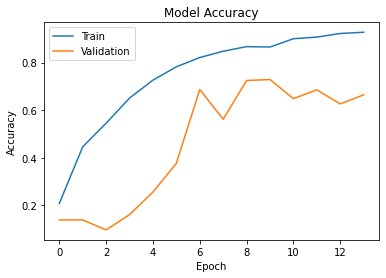

In [97]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [98]:
# Results for Test data

results5 = model5.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 1s 17ms/step - loss: 1.1354 - accuracy: 0.6653


In [99]:
# Predict labels using the model

y_pred_model5=model5.predict(X_test)

In [100]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model5=np.argmax(y_pred_model5,axis=1)

y_test_model5=np.argmax(y_test_encoded,axis=1)

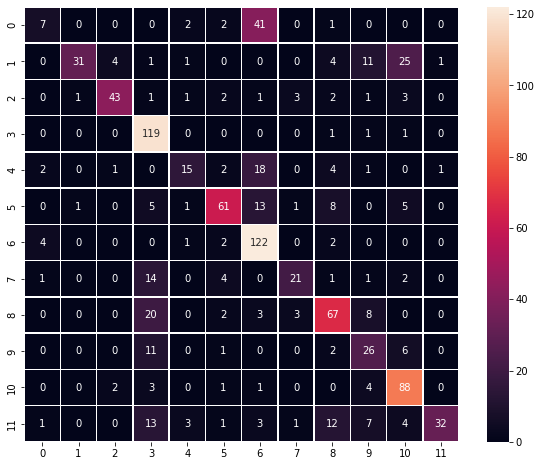

In [101]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model5,y_pred_model5)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [102]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model5), y_pred_model5))

              precision    recall  f1-score   support

           0       0.47      0.13      0.21        53
           1       0.94      0.40      0.56        78
           2       0.86      0.74      0.80        58
           3       0.64      0.98      0.77       122
           4       0.62      0.34      0.44        44
           5       0.78      0.64      0.71        95
           6       0.60      0.93      0.73       131
           7       0.72      0.48      0.58        44
           8       0.64      0.65      0.65       103
           9       0.43      0.57      0.49        46
          10       0.66      0.89      0.76        99
          11       0.94      0.42      0.58        77

    accuracy                           0.67       950
   macro avg       0.69      0.60      0.60       950
weighted avg       0.70      0.67      0.64       950



<b> Model 5 interpretations </b>

1. Train accuracy has improved significantly, but Test accuracy is not as good. Model is actually overfitting.


### Model6 -  CNN with same number of layers in Model2 with data augmentation


In most real-life case studies, it is generally difficult to collect lots of images and then train CNNs. In that case, one idea we can take advantage of is Data Augmentation. CNNs have the property of **translational invariance**, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images using the following techniques:  **Data Augmentation**

In most real-life case studies, it is generally difficult to collect lots of images and then train CNNs. In that case, one idea we can take advantage of is Data Augmentation. CNNs have the property of **translational invariance**, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images using the following techniques: 

**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

In [35]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [36]:
#data augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
                              #horizontal_flip = True,
                              #vertical_flip = True, 
                              #height_shift_range= 0.1, 
                              #width_shift_range=0.1, 
                              rotation_range=20, 
                              #shear_range = 0.1,
                              #zoom_range=0.1
                              fill_mode='nearest'                              
                              )

In [37]:
model6 = Sequential()

# Convolutional Layer 1
model6.add(Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3), padding = 'same'))
model6.add(MaxPooling2D(2,2))

# Convolutional Layer 2
model6.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
model6.add(MaxPooling2D(2,2))

# Convolutional Layer 3
model6.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
model6.add(MaxPooling2D(2,2))

# Convolutional Layer 4
model6.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
model6.add(MaxPooling2D(2,2))

# Flatten the outfor for fully connected layers
model6.add(Flatten())

# Fully Connected Layer 1

model6.add(Dense(128, activation='relu'))

# Fully Connected Layer 2
model6.add(Dense(64, activation='relu'))

# Fully Connected Layer 3
model6.add(Dense(32, activation='relu'))

# Fully Connected Layer 4
model6.add(Dense(16, activation='relu'))

# Output Layer
model6.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model6.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model6.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [38]:
history6 = model6.fit(train_datagen.flow(X_train,y_train_encoded,
                                       batch_size=32, 
                                       seed=42,
                                       shuffle=False),
                    epochs=30,
                    steps_per_epoch=X_train.shape[0] // 32,
                    validation_data=(X_val,y_val_encoded),
                    verbose=1)

Epoch 1/30
95/95 [==============================] - 25s 125ms/step - loss: 2.4446 - accuracy: 0.1296 - val_loss: 2.4262 - val_accuracy: 0.1382
Epoch 2/30
95/95 [==============================] - 10s 109ms/step - loss: 2.2299 - accuracy: 0.2339 - val_loss: 1.8548 - val_accuracy: 0.3474
Epoch 3/30
95/95 [==============================] - 10s 109ms/step - loss: 1.7279 - accuracy: 0.3743 - val_loss: 1.5137 - val_accuracy: 0.4276
Epoch 4/30
95/95 [==============================] - 12s 129ms/step - loss: 1.5723 - accuracy: 0.4237 - val_loss: 1.4334 - val_accuracy: 0.4618
Epoch 5/30
95/95 [==============================] - 10s 110ms/step - loss: 1.4520 - accuracy: 0.4891 - val_loss: 1.5302 - val_accuracy: 0.4724
Epoch 6/30
95/95 [==============================] - 10s 109ms/step - loss: 1.3428 - accuracy: 0.5355 - val_loss: 1.2266 - val_accuracy: 0.5816
Epoch 7/30
95/95 [==============================] - 10s 109ms/step - loss: 1.1733 - accuracy: 0.5849 - val_loss: 1.0670 - val_accuracy: 0.6579

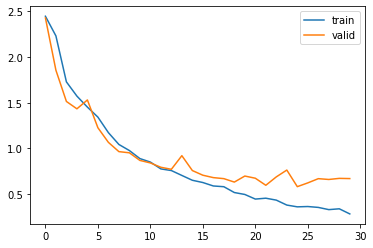

In [39]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history6.history)
hist['epoch'] = history6.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

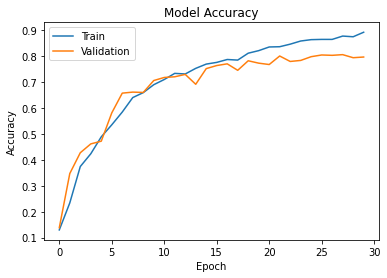

In [40]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
# Results for Test data

results6 = model6.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 0s 16ms/step - loss: 0.7979 - accuracy: 0.7884


In [42]:
# Predict labels using the model

y_pred_model6=model6.predict(X_test)

In [43]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model6=np.argmax(y_pred_model6,axis=1)

y_test_model6=np.argmax(y_test_encoded,axis=1)

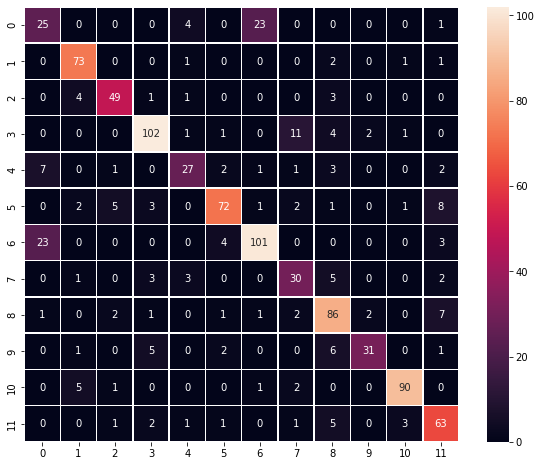

In [44]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model6,y_pred_model6)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model6), y_pred_model6))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        53
           1       0.85      0.94      0.89        78
           2       0.83      0.84      0.84        58
           3       0.87      0.84      0.85       122
           4       0.71      0.61      0.66        44
           5       0.87      0.76      0.81        95
           6       0.79      0.77      0.78       131
           7       0.61      0.68      0.65        44
           8       0.75      0.83      0.79       103
           9       0.89      0.67      0.77        46
          10       0.94      0.91      0.92        99
          11       0.72      0.82      0.76        77

    accuracy                           0.79       950
   macro avg       0.77      0.76      0.76       950
weighted avg       0.79      0.79      0.79       950



<b> Model 6 interpretations </b>

1. Model performs extremely well with data augmentation. Accuracy on Train jumps to 89% and on Test, it is 79%, BEST so far.
2. Several data augmentation options were tried, however it gives more or less same result on metrics.


### Model7 - CNN with same number of layers in Model2 with Transfer Learning from VGG16

Let's use **Transfer Learning**. Transfer Learning is when we leverage learnings of the models that were already trained on larger and high quality datasets for similar use case. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset. Below is a schematic of the VGG16 model - 

![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

We will directly use the convolutional and pooling layers from VGG16 and freeze their weights i.e. no training will be done on them. We will remove the already-present fully-connected layers and add our own fully-connected layers from Model1 for this classification task.


In [117]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [118]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [119]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [120]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [121]:
# Intializing a sequential model
model7 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model7.add(vgg_model)

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model7.add(Flatten())

# Fully Connected Layer 1

model7.add(Dense(128, activation='relu'))

# Fully Connected Layer 2
model7.add(Dense(64, activation='relu'))

# Fully Connected Layer 3
model7.add(Dense(32, activation='relu'))

# Fully Connected Layer 4
model7.add(Dense(16, activation='relu'))


# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model7.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# categorical_crossentropy is used as this is a multi-class classification problem. 
# Accuracy is used as the metric to measure the performance of the model.
# Compile model
model7.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                2

In [122]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 20%
history7=model7.fit(X_train, y_train_encoded, epochs=30, batch_size=32,class_weight=(class_weights), validation_data=(X_val,y_val_encoded),callbacks=[es, mc])  

Epoch 1/30
95/95 [==============================] - ETA: 0s - loss: 2.5790 - accuracy: 0.2365
Epoch 1: val_accuracy improved from -inf to 0.32500, saving model to best_model.h5
95/95 [==============================] - 11s 81ms/step - loss: 2.5790 - accuracy: 0.2365 - val_loss: 2.1255 - val_accuracy: 0.3250
Epoch 2/30
95/95 [==============================] - ETA: 0s - loss: 2.0978 - accuracy: 0.3398
Epoch 2: val_accuracy improved from 0.32500 to 0.36711, saving model to best_model.h5
95/95 [==============================] - 6s 66ms/step - loss: 2.0978 - accuracy: 0.3398 - val_loss: 1.8450 - val_accuracy: 0.3671
Epoch 3/30
95/95 [==============================] - ETA: 0s - loss: 1.7666 - accuracy: 0.4398
Epoch 3: val_accuracy improved from 0.36711 to 0.44868, saving model to best_model.h5
95/95 [==============================] - 6s 66ms/step - loss: 1.7666 - accuracy: 0.4398 - val_loss: 1.5910 - val_accuracy: 0.4487
Epoch 4/30
95/95 [==============================] - ETA: 0s - loss: 1.46

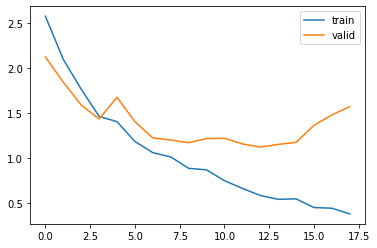

In [123]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history7.history)
hist['epoch'] = history7.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

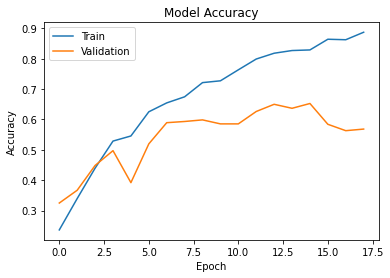

In [124]:
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [125]:
# Results for Test data

results7 = model7.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 3s 90ms/step - loss: 1.6724 - accuracy: 0.5800


In [126]:
# Predict labels using the model

y_pred_model7=model7.predict(X_test)

In [127]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model7=np.argmax(y_pred_model7,axis=1)

y_test_model7=np.argmax(y_test_encoded,axis=1)

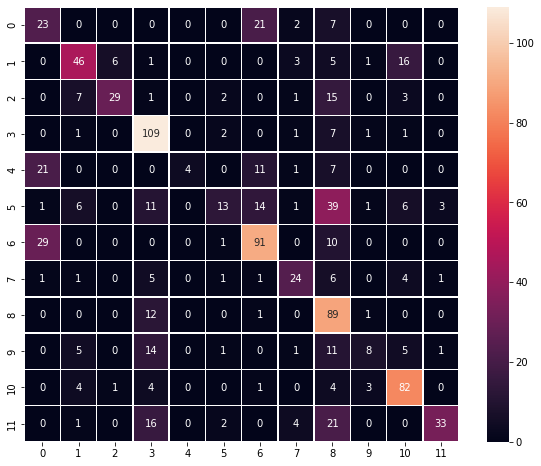

In [128]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model7,y_pred_model7)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [129]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model7), y_pred_model7))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        53
           1       0.65      0.59      0.62        78
           2       0.81      0.50      0.62        58
           3       0.63      0.89      0.74       122
           4       1.00      0.09      0.17        44
           5       0.59      0.14      0.22        95
           6       0.65      0.69      0.67       131
           7       0.63      0.55      0.59        44
           8       0.40      0.86      0.55       103
           9       0.53      0.17      0.26        46
          10       0.70      0.83      0.76        99
          11       0.87      0.43      0.57        77

    accuracy                           0.58       950
   macro avg       0.65      0.51      0.51       950
weighted avg       0.64      0.58      0.55       950



<b> Model 7 interpretations </b>

1. Model seems to be overfit as well. Train accuracy of 89% and Test accuracy of 58%.


### Model8 - CNN with same number of layers in Model2 with data augmentation & Transfer Learning from VGG16

In [46]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [47]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (128,128,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [48]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [49]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [50]:
# Intializing a sequential model
model8 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model8.add(vgg_model)

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model8.add(Flatten())

# Fully Connected Layer 1

model8.add(Dense(128, activation='relu'))

# Fully Connected Layer 2
model8.add(Dense(64, activation='relu'))

# Fully Connected Layer 3
model8.add(Dense(32, activation='relu'))

# Fully Connected Layer 4
model8.add(Dense(16, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model8.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# categorical_crossentropy is used as this is a multi-class classification problem. 
# Accuracy is used as the metric to measure the performance of the model.
# Compile model
model8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                2

In [51]:
# Same Image generator as in earlier section (Model 6) is used

history8 = model8.fit(train_datagen.flow(X_train,y_train_encoded,
                                       batch_size=32, 
                                       seed=42,
                                       shuffle=False),
                    epochs=30,
                    steps_per_epoch=X_train.shape[0] // 32,
                    validation_data=(X_val,y_val_encoded),
                    verbose=1)

Epoch 1/30
95/95 [==============================] - 16s 140ms/step - loss: 2.3691 - accuracy: 0.1845 - val_loss: 2.1634 - val_accuracy: 0.2750
Epoch 2/30
95/95 [==============================] - 15s 160ms/step - loss: 1.9229 - accuracy: 0.3411 - val_loss: 1.8590 - val_accuracy: 0.3329
Epoch 3/30
95/95 [==============================] - 12s 125ms/step - loss: 1.6376 - accuracy: 0.4332 - val_loss: 1.5587 - val_accuracy: 0.4368
Epoch 4/30
95/95 [==============================] - 12s 126ms/step - loss: 1.4577 - accuracy: 0.4921 - val_loss: 1.4992 - val_accuracy: 0.4803
Epoch 5/30
95/95 [==============================] - 13s 134ms/step - loss: 1.3692 - accuracy: 0.5257 - val_loss: 1.3267 - val_accuracy: 0.5316
Epoch 6/30
95/95 [==============================] - 12s 125ms/step - loss: 1.2193 - accuracy: 0.5819 - val_loss: 1.4532 - val_accuracy: 0.5171
Epoch 7/30
95/95 [==============================] - 13s 137ms/step - loss: 1.1363 - accuracy: 0.6102 - val_loss: 1.3077 - val_accuracy: 0.5434

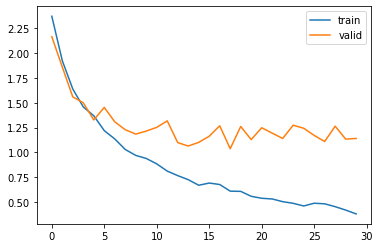

In [52]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history8.history)
hist['epoch'] = history8.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

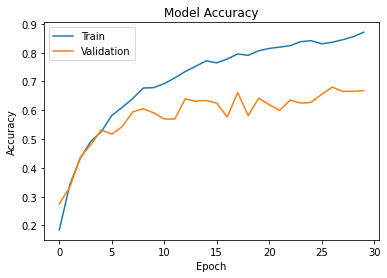

In [53]:
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [54]:
# Results for Test data

results8 = model8.evaluate(X_test, y_test_encoded)

30/30 [==============================] - 3s 91ms/step - loss: 1.1628 - accuracy: 0.6684


In [55]:
# Predict labels using the model

y_pred_model8=model8.predict(X_test)

In [56]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_model8=np.argmax(y_pred_model8,axis=1)

y_test_model8=np.argmax(y_test_encoded,axis=1)

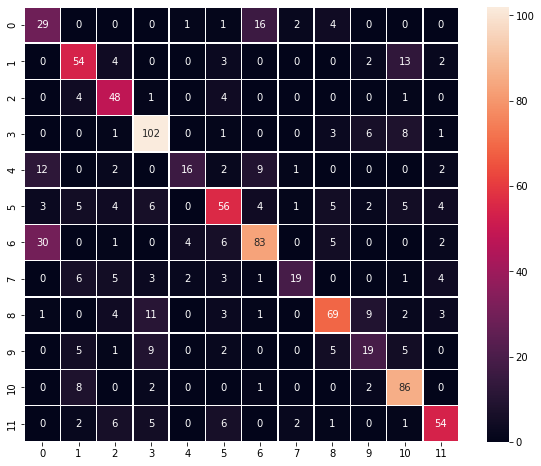

In [57]:
# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_model8,y_pred_model8)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report((y_test_model8), y_pred_model8))

              precision    recall  f1-score   support

           0       0.39      0.55      0.45        53
           1       0.64      0.69      0.67        78
           2       0.63      0.83      0.72        58
           3       0.73      0.84      0.78       122
           4       0.70      0.36      0.48        44
           5       0.64      0.59      0.62        95
           6       0.72      0.63      0.67       131
           7       0.76      0.43      0.55        44
           8       0.75      0.67      0.71       103
           9       0.47      0.41      0.44        46
          10       0.70      0.87      0.78        99
          11       0.75      0.70      0.72        77

    accuracy                           0.67       950
   macro avg       0.66      0.63      0.63       950
weighted avg       0.68      0.67      0.66       950



<b> Model 8 interpretations </b>

1. Decent model performance with accuracy of 87% on Train and 67% on Test dataset. Still model is overfitting.

# 11. <b><font color="blue">Model Performance Evaluation</b>

We created 8 models so far. Below is a summary of all - 


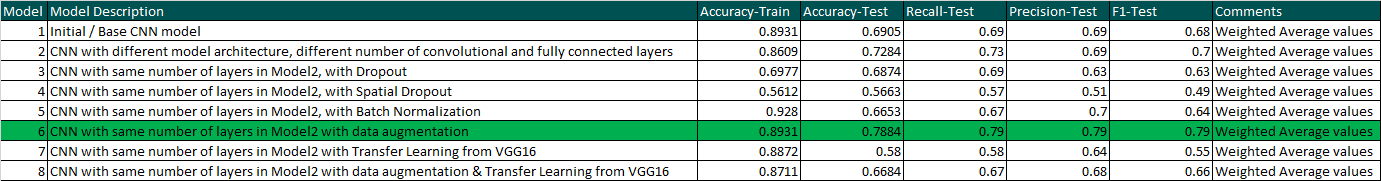


After several tries with Dropout, Spatial Dropout, Batch Normalization, Data Augmentation and Transfer Learning, Model 6 (Smaller number of convolutional and dense layers, with data augmentation) gave the best performance on the performance metrics that are important in this case (Accuracy & F1 Score). 

<b> Model 6 is the recommended model. </b>

# 12. <b><font color="blue">Actionable Insights & Recommendations</b>

1. Model 6 is the recommended CNN model.

2. Characteristics of the model are - 
  * 4 Convolutional or Feature Extraction Layers
  * 4 Fully Connected Dense Layers
  * Adam Optimizer
  * 176,396 trainable parameters
  * Train data was augmented to generate more variation in the data for training purposes

3. Details on metrics - 
  * Accuracy - 89% on Train, 79% on Test datasets
  * F1 score - 79% on Test dataset

4. Below can be tried for model performance improvement - 
  * Expriment with different network topology, in terms of different filter sizes and different number of filters
  * Expriment with different dense layer topology, possibly identify via hyperparameter tuning, if possible
  * Leverage Other SIMILAR Transfer Learning architectures for image classification can be tried out.
  * More Data Augmentation can be tried out.